This project focuses on using various models and techniques to classify hand drawn numbers correctly.

I will import all essential packages in the beggining, but include the imports throughout the code, beaceuse it hewlps me know what I used to execute on that funciton. I hope this explains why there are scattered packeages imported in the code, it is a learning device for me.

# Import essential packages and clean Data

In [4]:
#essential packages for dataimport/visualization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy import stats

#More advanced visualizing
import seaborn as sns
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
sns.set(style='ticks', palette='Set2')
# shows graphs in notebook
%matplotlib inline

#how to test our model with an f1 score
from sklearn.metrics import f1_score

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set a few plotting defaults
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18
plt.rcParams['patch.edgecolor'] = 'k'

# Cool command to get rid of useless warning messages
import warnings
def ignore_warn(*args, **kwargs):
   pass
warnings.warn = ignore_warn

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

#from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
#from keras.models import Sequential
#from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
#from keras.optimizers import RMSprop
#from keras.preprocessing.image import ImageDataGenerator
#from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

In [4]:
## Homework recmoended this line of code, but it didnt work

#from sklearn.datasets import fetch_mldata

#mnist = fetch_mldata("MNIST original")
#X = mnist.data / 255.0
#y = mnist.target

https://github.com/tfolkman/byu_econ_applied_machine_learning/blob/master/lectures/Lecture_12_Dimensionality%20Reduction.ipynb

## Importing Data

This is how I brought in the data, from there I will look at the Dataframe to better understand what type of data we are working with.

In [5]:
train = pd.read_csv("/Users/tclawson/Desktop/HW5/train.csv")

In [6]:
test = pd.read_csv("/Users/tclawson/Desktop/HW5/test.csv")

In [7]:
train.head(20)

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0       1       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       1       0       0       0       0       0       0       0       0   
3       4       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   
5       0       0       0       0       0       0       0       0       0   
6       7       0       0       0       0       0       0       0       0   
7       3       0       0       0       0       0       0       0       0   
8       5       0       0       0       0       0       0       0       0   
9       3       0       0       0       0       0       0       0       0   
10      8       0       0       0       0       0       0       0       0   
11      9       0       0       0       0       0       0       0       0   
12      1       0       0       0       0       0       0       0       0   
13      3       0       0       0       0       0       0       0       0   
14      3       0       0       0       0       0       0       0       0   
15      1       0       0       0       0       0       0       0       0   
16      2       0       0       0       0       0       0       0       0   
17      0       0       0       0       0       0       0       0       0   
18      7       0       0       0       0       0       0       0       0   
19      5       0       0       0       0       0       0       0       0   

    pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0        0    ...            0         0         0         0         0   
1        0    ...            0         0         0         0         0   
2        0    ...            0         0         0         0         0   
3        0    ...            0         0         0         0         0   
4        0    ...            0         0         0         0         0   
5        0    ...            0         0         0         0         0   
6        0    ...            0         0         0         0         0   
7        0    ...            0         0         0         0         0   
8        0    ...            0         0         0         0         0   
9        0    ...            0         0         0         0         0   
10       0    ...            0         0         0         0         0   
11       0    ...            0         0         0         0         0   
12       0    ...            0         0         0         0         0   
13       0    ...            0         0         0         0         0   
14       0    ...            0         0         0         0         0   
15       0    ...            0         0         0         0         0   
16       0    ...            0         0         0         0         0   
17       0    ...            0         0         0         0         0   
18       0    ...            0         0         0         0         0   
19       0    ...            0         0         0         0         0   

    pixel779  pixel780  pixel781  pixel782  pixel783  
0          0         0         0         0         0  
1          0         0         0         0         0  
2          0         0         0         0         0  
3          0         0         0         0         0  
4          0         0         0         0         0  
5          0         0         0         0         0  
6          0         0         0         0         0  
7          0         0         0         0         0  
8          0         0         0         0         0  
9          0         0         0         0         0  
10         0         0         0         0         0  
11         0         0         0         0         0  
12         0         0         0         0         0  
13         0         0         0         0         0  
14    

Given the information in the data frame above, we are working with image related data. 

## To begin cleaning, lets start by seperating the labels so we dont have any biased results. Then we can plot how often each type of number occurs, to see if our data is skewed or imbalanced. 

In [8]:
Y_train = train["label"]

# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 

# free some space
del train 

g = sns.countplot(Y_train)

Y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

## We can see that the labels (or type of number shown) is evenly spread between the 10 different digits

Since the data is evenly distributed, lets check for any null values.

In [9]:
# Check the training data for null vlaues
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [10]:
# Check the test data set for any null vlaues
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In both the training and testing data set, there are no missing values!! We can move forward witht the project.

Now we will normalize the greyscale on al the images

In [11]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0

In [12]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [13]:
# Set the random seed
random_seed = 2

In [14]:
# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

Lets visualize some of these number drawings

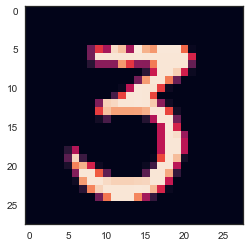

In [15]:
g = plt.imshow(X_train[3][:,:,0])

In [16]:
g = plt.imshow(X_train[88][:,:,0])

# PCA

Lets start by using the PCA model in SKLearn
The following tchniques and code are reinterpreted from Tyler Folkmand lecture #12

Knowing the data is balanced, we can reimport and seperate the pixels from the classifiers



In [6]:
data = pd.read_csv("/Users/tclawson/Desktop/HW5/train.csv")

In [7]:
X = data.loc[:,"pixel0":"pixel783"]
y = data.label

In [8]:
#here we know the size of the data
data.shape

(42000, 785)

In [9]:
#essential packages from SK Learn
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import numpy as np

In [11]:
#Here we will visualize the "elbow method" which shows the amount of variance explained, 
#plotted against the amount of components in the model, 
#its a visual way to undersatnd how many compnents are needed to explain a model 


pca = PCA(n_components=784)
X_pca = pca.fit_transform(X)
cum_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(len(cum_ratio)), cum_ratio)
plt.vlines(ymin=0,ymax=cum_ratio[100],x=85)
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Elbow Method')

Text(0.5,1,'Elbow Method')

This shows us a serious elbow at around 85 variables, lets see exactly how many is will take to explain 95% of the variance

In [12]:
#this prints the amount of variables given the variance we decide.

index_95 = np.argmax(cum_ratio >= 0.95)
print(index_95)
print(cum_ratio[index_95])

153
0.9504332382633769


In [13]:
#what a bout 90% varaince explained
index_95 = np.argmax(cum_ratio >= 0.90)
print(index_95)
print(cum_ratio[index_95])

86
0.9006115525464063


Our estimate from the elbow graph was spot on!!

In [14]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)
print(X_pca.shape)

(42000, 154)


# The power of the frst two variable : Answering question B
https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

In [15]:
#this will only use the first 2 dimensions available in PCA
pca = PCA(n_components=2)
X_2dim = pca.fit_transform(X)

In [16]:
#this shows us the varaince of these first two attributes
pca.explained_variance_ratio_


array([0.09748938, 0.07160266])

We see that the variance explained by the first variable is 9.7% and 7.1% on the second!

In [17]:
#THis makes a pca fit 

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [38]:
#this is a printout of the key compnents

print(pca.components_)


[[ 4.78620106e-19  5.70131841e-19 -3.32475848e-18 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [ 2.30279171e-18  8.82661718e-20  4.10315421e-18 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]]


In [39]:
#the explained variance
print(pca.explained_variance_)


[334780.59149381 245885.06503207]


In [40]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(data)
print(data.shape)
print(projected.shape)

(42000, 785)
(42000, 2)


In [42]:
#key packages form this visualization portion

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm




I imported the following visualization for the first two compnoents from this blog. https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

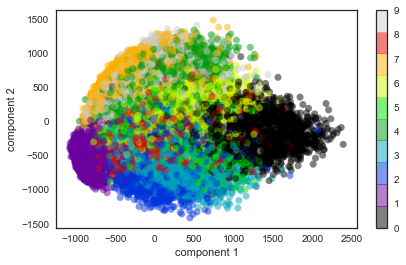

In [44]:
#THIS is the two key componenents plotted  

plt.scatter(projected[:, 0], projected[:, 1],
            c=data.label, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

You can notice that even with only two components you can see some clear isolation between some of the groups, for example 1 and 7. The plot shows the data plotted on only the first two key variables.

# Question D; double visualization

In [53]:
# It looks like the data contains only the pixels of the images except for the column titled "label"
# I will drop that column as it contains no significant information

Y_train = data['label'].values.astype('int32')

data.drop(['label'], axis=1, inplace=True)

X_train = (data.values).astype('float32')

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler()
scaler.fit(X)
x_sc = scaler.transform(X)

In [47]:
type(pca)

sklearn.decomposition.pca.PCA

In [48]:
NCOMPONENTS = 86

pca = PCA(n_components=NCOMPONENTS)
x_pca_data = pca.fit_transform(x_sc)
pca_std = np.std(x_pca_data)


In [49]:
inv_pca = pca.inverse_transform(x_pca_data)
inv_sc = scaler.inverse_transform(inv_pca)

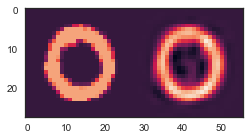

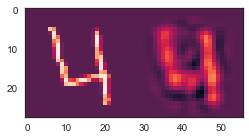

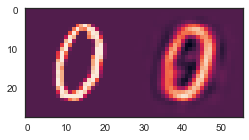

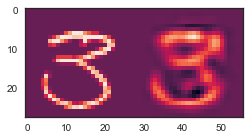

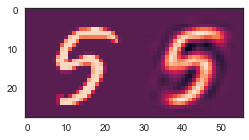

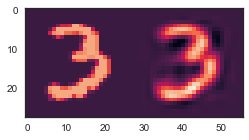

In [68]:
# Now the side by side images should be produced for a human eye analaysis to see the differences on a few samples
def side_by_side(indexes):
   org = X_train[indexes].reshape(28,28)
   rec = inv_sc[indexes].reshape(28,28)
   pair = np.concatenate((org, rec), axis=1)
   plt.figure(figsize=(4,2))
   plt.imshow(pair)
   plt.show()

for index in range(0,10):
   side_by_side(index)

Use PCA to reduce the dimensionality

a. How many components did you use? Why?

b. Plot the first two components. Do you notice any trends? What is this plot showing us?

c. Why would you use PCA? What is it doing? And what are the drawbacks?

d. Plot some of the images, then compress them using PCA and plot again. How does it look?

## 1D: Answer, they both look clearlt identified and we have done that while removing HUGE amounts of dimensionality

## Question A.

ow many componenets did you use? Why?

- I used 153 components. I used 153 because that is what was required to explain 95% of the variance


that result was found in this code:
    
    index_95 = np.argmax(cum_ratio >= 0.95)
    print(index_95)
    print(cum_ratio[index_95])

which gave the following result

    153
    0.9504332382633769


## Question B. Plot the first 2 compnents



In [154]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=data.label, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

## Question C.


Why use PCA?

    -We use PCA to reduce dimensionality, aka reduce the amount of features. Every feature adds a new dimension to the data, which creates vast distances between very similar data points. 
 
What is it doing?

    -It is looking for the fewest amount of features that can explian a specific amount of variance, in this example we were looking for 95% of the varaince exaplined in the fewest maount of features. You can set it to the amount you see fit.  
    
What are the drawbacks? (I found this to be a helpful resource, (https://www.quora.com/What-are-the-disadvantages-of-a-PCA)

    -It values the variance of features more thatn anything else. If something has small variance it is interpreted as noise, even if it helps determine the class of something. 
    
    -It assumes a linear realtionship between features. 
    

   

# t-SNE

Use t-SNE to plot the first two components (you should probably random sample around 10000 points):

a. How does this plot differ from your PCA plot?

b. How robust is it to changes in perplexity?

c. How robust is it to different learning rate and number of iterations?

In [155]:
#import data
data = pd.read_csv("/Users/tclawson/Desktop/HW5/train.csv")

In [156]:
#resize and define the label and the pixel data
X = data.loc[:,"pixel0":"pixel783"]
y = data.label

In [157]:
#show the size of the data frame
data.shape

(42000, 785)

In [160]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import numpy as np

#first reduce dimensionality before feeding to t-sne
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)

rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 10000

tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[:10000]) 

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.015s...
[t-SNE] Computed neighbors for 10000 samples in 9.162s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 374.040251
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.460052
[t-SNE] Error after 1000 iterations: 1.689130


In [170]:
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

In [163]:
from sklearn.datasets import make_regression
# Set a few plotting defaults
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18
plt.rcParams['patch.edgecolor'] = 'k'

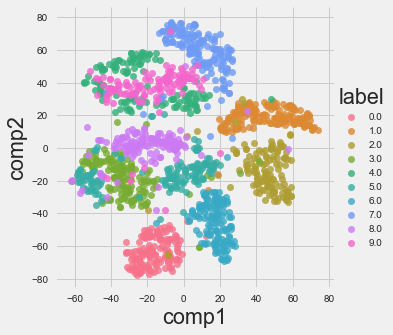

In [164]:
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

## Answer 2A. This plot is different, it much more clearly defined compared to PCA

## Question 2B.

Changes in perplexity


Lets run the model again and lower the perplexity. We cannot raise perplexity above the amount of features we have, so lets decrease it by 50%

In [55]:
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)

rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 10000

tsne = TSNE(n_components=2, verbose=1, perplexity=25, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[:10000])

[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.024s...
[t-SNE] Computed neighbors for 10000 samples in 7.196s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 332.924799
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.392609
[t-SNE] Error after 1000 iterations: 1.817120


In [57]:
#because I am repeating this line of code, I made a function for later use, it helps fund key components
def compfinder():
        df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
        df_tsne['label'] = y[rows[:n_select]]

In [58]:
compfinder

<function __main__.compfinder()>

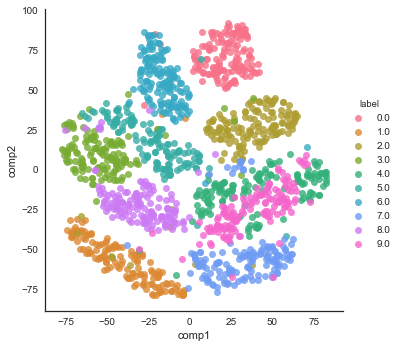

In [61]:
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

## Answer: We can see with less perplexity, that the model is less clear and defined.

## Question 2C. 

How robust is it to different learning rate and number of iterations?

In [173]:
#this time lets maintian the perplexity of 50 from our first tsne model, but we'll decrease the number of iterations.
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)

rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 10000

tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=250, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[:10000]) 

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.014s...
[t-SNE] Computed neighbors for 10000 samples in 9.120s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 345.977465
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.622536
[t-SNE] Error after 251 iterations: 1797693134862315708145274237317043567980

In [66]:
compfinder

<function __main__.compfinder()>

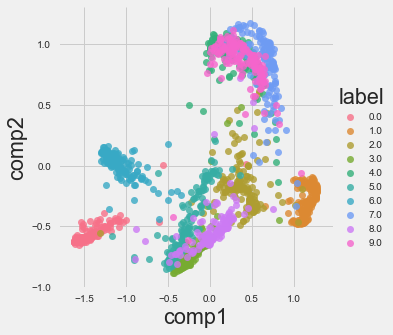

In [193]:
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

## Answer(iterations): By decreasing iterations we see a much less defined and unclear division between groups

In [62]:
#this time lets maintian the perplexity of 50 from our first tsne model, and iterations, but changing the leanring rate
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)

rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 10000

tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=400)
tsne_results = tsne.fit_transform(X_pca[:10000])

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.014s...
[t-SNE] Computed neighbors for 10000 samples in 8.105s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 339.757485
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.521790
[t-SNE] Error after 1000 iterations: 1.670619


In [67]:
compfinder

<function __main__.compfinder()>

In [65]:
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

## Answer(learning rate): By increasing my learning rate, we see more clearly defined groups, likely the best tSNE model we have seen




# K means clustering

Perform k-means clustering:

a. How did you choose k?

b. How did you evaluate your clustering?

c. Visualize your clusters using t-sne

d. Did you scale your data?

In [75]:
#lets use a scikit learn package to run kmeans
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, n_init=50, n_jobs=-1)
kmeans.fit(data[['0','1','2','3','4','5','6','7','8','9']])
sk_clusters = kmeans.predict(data[['0', '1','2','3','4','5','6','7','8','9']])


plt.scatter(df[''], df[''], c=sk_clusters)
plt.xlabel("Variable 1")
plt.ylabel("Variable 2")
plt.xlim(0,120000)
plt.ylim(0,120000)
plt.plot(range(120000), range(120000))

plt.scatter(projected[:, 0], projected[:, 1],
            c=data.label, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

KeyError: "['0' '1' '2' '3' '4' '5' '6' '7' '8' '9'] not in index"

In [20]:
#lets use a scikit learn package to run kmeans
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, n_init=50, n_jobs=-1)
kmeans.fit(data[[0,1,2,3,4,5,6,7,8,9]])
sk_clusters = kmeans.predict(Y[['0', '1','2','3','4','5','6','7','8','9']])


plt.scatter(projected[:, 0], projected[:, 1], c=sk_clusters)
plt.xlabel("Variable 1")
plt.ylabel("Variable 2")
plt.xlim(0,120000)
plt.ylim(0,120000)
plt.plot(range(120000), range(120000))




KeyError: '[0 1 2 3 4 5 6 7 8 9] not in index'

## A: How did you choose K?

## There are 10 different categories, for the 10 differnet digits

## b. How did you evaluate your clustering?

## c. Visualize your clusters using t-sne

## d. Did you scale your data?

 ##    NO, as seen in section one, the data is evenly distributed. I did reduce the dimensionality of the data to make the k means process easier to find neighboring points, while maintaning a significant amount of variance.

## 4.Perform hierarchical clustering:

a. Plot your dendrogram

b. How many clusters seem reasonable based off your graph?

c. How does your dendrogram change with different linkage methods?

## A. Plot your dendogram

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage

The code beneath will draw a dendogram using the complete linkage method. It will break down features in the most obvious and distinguishable ways

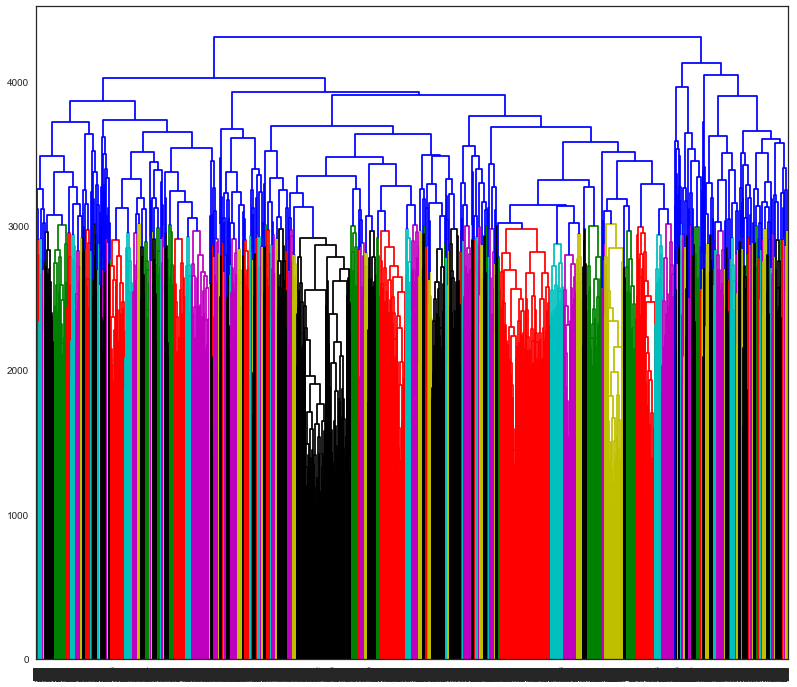

In [22]:

Z = linkage(X, 'complete')
plt.figure(figsize=(12, 12))
_ = dendrogram(Z)

In [24]:
Z = linkage(data, 'single')
plt.figure(figsize=(12, 12))
_ = dendrogram(Z)

RecursionError: maximum recursion depth exceeded while getting the str of an object

<Figure size 864x864 with 0 Axes>

By running a single linkage method, i encountered a recursion error. This shows that the complete method is more robust for such a large dataset

## B. How many clusters seem reasonable based off your graph?

## 14, by drawing a horizonatl line at around Y=3750 we cross the paths of 14 different vertical lines, after that, the gorupings and differences get very messy and very tight. 

## C. How does your dendrogram change with different linkage methods?

## My only dendogram that worked was using complete linkage, trying single linkage I ran into a recursion problem, which was interesting to find out by looking at the error it ran the model thousands of times, but must have found too many distinctions or tried splitting individual values.